### Q1. When is the best time of day, day of the week, and time of year to fly to minimize delays?

In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('airline2_python.db')

In [3]:
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
planes = pd.read_csv("plane-data.csv")

airports.to_sql('airports', con = conn, index = False)
carriers.to_sql('carriers', con = conn, index = False)
planes.to_sql('planes', con = conn, index = False)

In [4]:
c = conn.cursor()

In [5]:
c.execute('''
CREATE TABLE ontime (
  Year int,
  Month int,
  DayofMonth int,
  DayOfWeek int,
  DepTime  int,
  CRSDepTime int,
  ArrTime int,
  CRSArrTime int,
  UniqueCarrier varchar(5),
  FlightNum int,
  TailNum varchar(8),
  ActualElapsedTime int,
  CRSElapsedTime int,
  AirTime int,
  ArrDelay int,
  DepDelay int,
  Origin varchar(3),
  Dest varchar(3),
  Distance int,
  TaxiIn int,
  TaxiOut int,
  Cancelled int,
  CancellationCode varchar(1),
  Diverted varchar(1),
  CarrierDelay int,
  WeatherDelay int,
  NASDelay int,
  SecurityDelay int,
  LateAircraftDelay int
)
''')

conn.commit()

In [6]:
for year in range(2006, 2009):
    print('Processing: ', year)
    ontime = pd.read_csv(str(year)+".csv")    
    ontime.to_sql('ontime', con = conn, if_exists = 'append', index = False)

conn.commit()

Processing:  2006
Processing:  2007
Processing:  2008


In [7]:
c.execute('''
SELECT name
FROM sqlite_master
WHERE type = 'table'
''').fetchall()

[('airports',), ('carriers',), ('planes',), ('ontime',)]

In [8]:
## Average departure delay based on month of the year to go

c.execute('''
SELECT Month AS month, AVG(ontime.DepDelay) AS avg_DepDelay, AVG(ontime.ArrDelay) AS avg_ArrDelay
FROM ontime 
GROUP BY month
ORDER BY avg_DepDelay
''')

AvgDelayMonth = c.fetchall()
print("Month",AvgDelayMonth[0][0],",September, is the best month to travel where the average delay experienced is the lowest")

Month 9 ,September, is the best month to travel where the average delay experienced is the lowest


In [9]:
AvgDelayMonth = pd.DataFrame(AvgDelayMonth)
AvgDelayMonth.columns = ['Month','Avg_DepDelay','Avg_ArrDelay']
AvgDelayMonth['AvgDelay'] = AvgDelayMonth['Avg_DepDelay'] + AvgDelayMonth['Avg_ArrDelay']
AvgDelayMonth

,Month,Avg_DepDelay,Avg_ArrDelay,AvgDelay
0,9,7.438083,6.034441,13.472524
1,11,8.188426,6.002432,14.190858
2,5,8.432513,6.964305,15.396818
3,4,8.838650,7.264470,16.103120
4,10,9.285199,8.559212,17.844411
5,1,9.968299,8.360868,18.329167
6,3,11.369148,9.740652,21.109800
7,8,11.757647,10.662703,22.420351
8,2,12.337426,11.377763,23.715189
9,7,13.773708,12.736940,26.510648


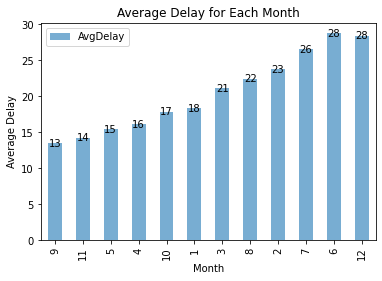

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ax = AvgDelayMonth.plot(kind='bar', x = 'Month', y= 'AvgDelay',
                    title = 'Average Delay for Each Month', 
                    ylabel = "Average Delay", xlabel = "Month",
                    alpha = 0.6, width = 0.5)
    
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy() 
    ax.text(x = x+width/2, 
            y = y+height, 
            s = int(height), 
            ha='center', va='center')
    
plt.show()


In [17]:
## For where Month = 9, The best day of the week and what time of the day

c.execute('''
SELECT Month AS month, DayOfWeek AS Day, AVG(DepDelay) AS avg_DepDelay, AVG(ArrDelay) AS avg_ArrDelay, DepTime AS DepTime
FROM ontime WHERE ontime.Month = 9
GROUP BY DayOfWeek
ORDER BY avg_DepDelay
''')

x = c.fetchall()
print("Day", x[1][1],", Saturday, of each week during September offers the lowest Delays where the best time for Departure would be around",x[1][4])

Day 6 , Saturday, of each week during September offers the lowest Delays where the best time for Departure would be around 1112


In [21]:
AvgDelayWeek = pd.DataFrame(x)
AvgDelayWeek.columns = ['Month','Day','Avg_DepDelay','Avg_ArrDelay','DepTime']
AvgDelayWeek['AvgDelay'] = AvgDelayWeek['Avg_DepDelay'] + AvgDelayWeek['Avg_ArrDelay']
AvgDelayWeek

,Month,Day,Avg_DepDelay,Avg_ArrDelay,DepTime,AvgDelay
0,9,3,4.729911,3.209542,1941,7.939453
1,9,6,5.543865,2.336732,1112,7.880597
2,9,2,6.580285,5.412226,2012,11.992511
3,9,4,7.034385,6.969375,1932,14.003760
4,9,7,8.213023,6.113118,830,14.326142
5,9,1,8.372831,6.576143,1927,14.948974
6,9,5,11.084631,11.027154,1939,22.111785
